In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import *
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("C:/Dataset/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


DATA Cleaning

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.shape

(303, 14)

In [13]:
df.duplicated().sum()

1

In [15]:
df[df.duplicated()] #Check the duplicate row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Outliers ----> Tree algorithm don't get affected by outliers

Label Encoding ----->Aldready done in the dataset

Feature Selection
VIF -->checks the multicolinearity, that is not the problem in the Tree algorithm
We can go ahead with other feature selection techniques
>corelation
>RFE - Recursive feature elimination

In the given dataset I will not go ahead with any of the FS techniques
as it aldready we have less feature and all have significance in medical Terms

In [36]:
#Split the data into dependent and independent
x = df.iloc[:,:-1]
y = df['target']

In [32]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

In [42]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [44]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [46]:
y_train

84     1
270    0
89     1
40     1
130    1
      ..
163    1
214    0
95     1
32     1
131    1
Name: target, Length: 211, dtype: int64

In [48]:
y_test

165    0
99     1
80     1
113    1
138    1
      ..
102    1
200    0
228    0
284    0
246    0
Name: target, Length: 91, dtype: int64

Model Building

In [55]:
dt_model = DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

In [57]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dt_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [61]:
y_test

165    0
99     1
80     1
113    1
138    1
      ..
102    1
200    0
228    0
284    0
246    0
Name: target, Length: 91, dtype: int64

In [65]:
accuracy_score(y_test,y_pred)

0.7252747252747253

In [67]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[31, 11],
       [14, 35]], dtype=int64)

<Axes: >

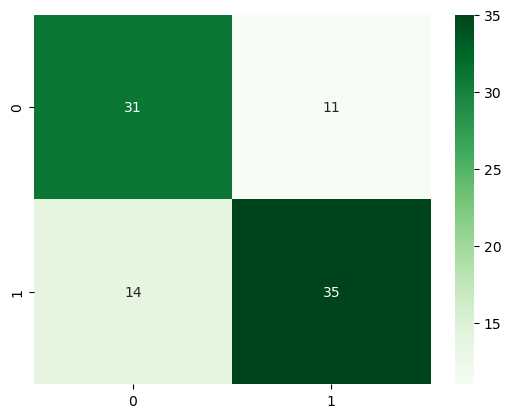

In [69]:
sns.heatmap(cm,cmap="Greens",annot=True)

In [71]:
depth = [1,2,3,4,5,6,7,8,9,10]

In [73]:
for i in depth:
    dt_model = DecisionTreeClassifier(max_depth=i,random_state=1213)
    dt_model.fit(x_train,y_train)
    y_pred = dt_model.predict(x_test)
    print("With the tree depth",i,"the accuracy is",accuracy_score(y_test,y_pred))

With the tree depth 1 the accuracy is 0.7802197802197802
With the tree depth 2 the accuracy is 0.7032967032967034
With the tree depth 3 the accuracy is 0.7582417582417582
With the tree depth 4 the accuracy is 0.7582417582417582
With the tree depth 5 the accuracy is 0.7472527472527473
With the tree depth 6 the accuracy is 0.7802197802197802
With the tree depth 7 the accuracy is 0.7582417582417582
With the tree depth 8 the accuracy is 0.7802197802197802
With the tree depth 9 the accuracy is 0.7802197802197802
With the tree depth 10 the accuracy is 0.7802197802197802


In [75]:
dt_model = DecisionTreeClassifier(max_depth=6,random_state=1213)

In [77]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1213)

In [81]:
y_pred = dt_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [83]:
accuracy_score(y_test,y_pred)

0.7802197802197802

In [85]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  9],
       [11, 38]], dtype=int64)

<Axes: >

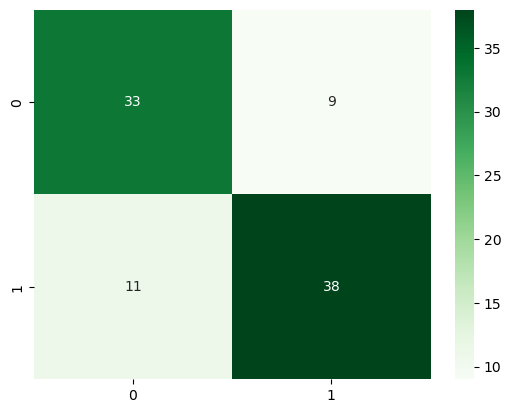

In [87]:
sns.heatmap(cm,cmap='Greens',annot=True)

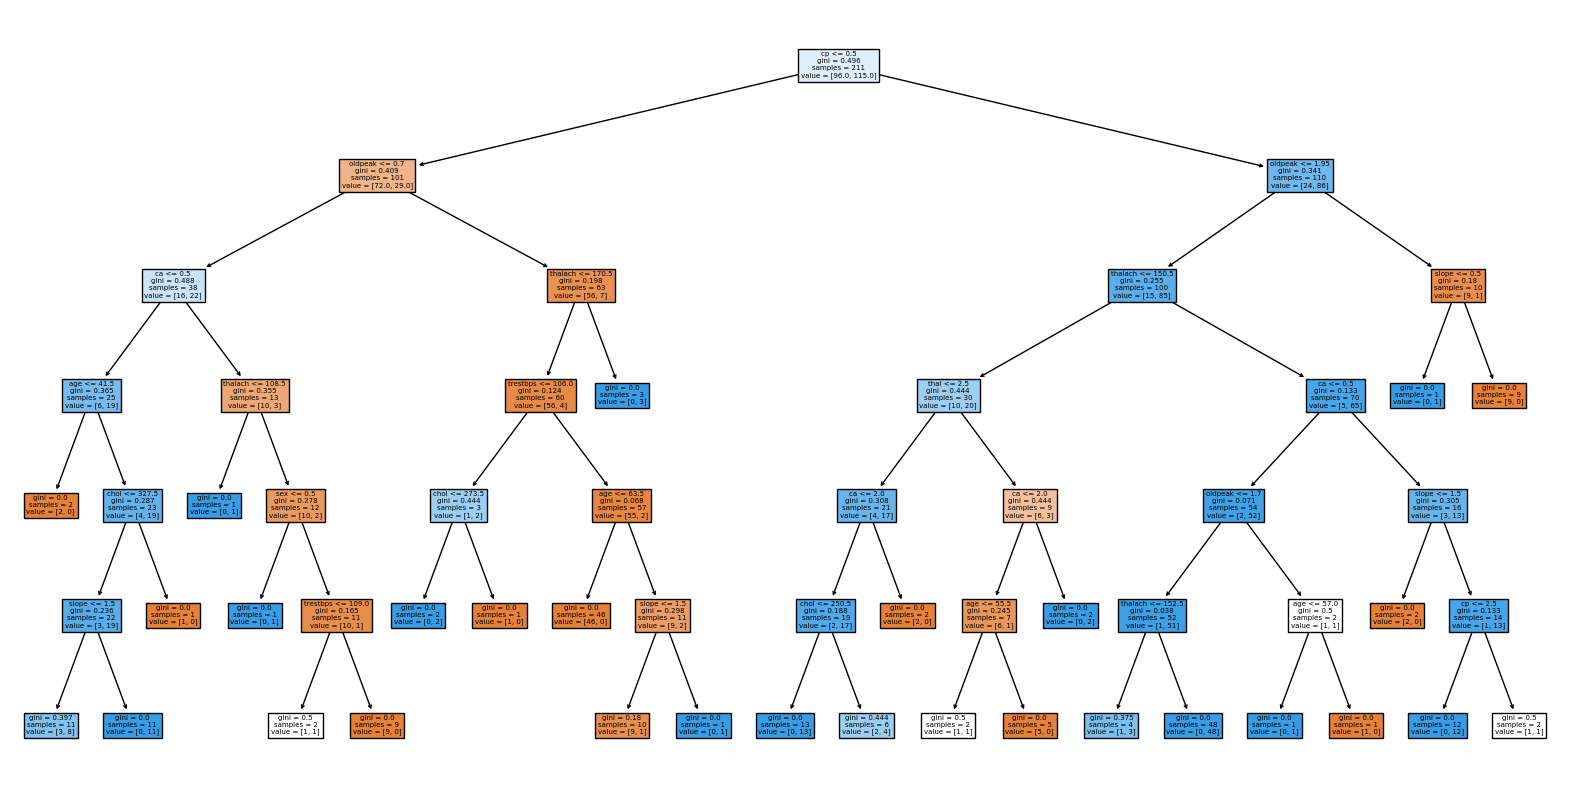

In [91]:
plt.figure(figsize=(20,10))
plot_tree(dt_model,filled=True,feature_names=x.columns)
plt.show()